In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow import keras
import os

In [36]:
filenames = sorted(os.listdir('DIV2K_train_HR'))

block_size = 32
stride = 16
row_num = (1024 - block_size) // stride + 1
col_num = (1024 - block_size) // stride + 1
# img = cv2.resize(cv2.imread('DIV2K_train_HR/'+filenames[0]),(1024,1024))
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print(img.shape)

# x = 0
# y = 0
# x_start = x*stride
# x_end = x_start+block_size
# y_start = y*stride
# y_end = y_start+block_size
# block = img[x_start:x_end,y_start:y_end, :]
# plt.figure()
# plt.imshow(img)
# plt.figure()
# plt.imshow(block)

labels = []
for file in filenames:
    img = cv2.resize(cv2.imread('DIV2K_train_HR/'+file),(1024,1024))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    for y in range(row_num):
        for x in range(col_num):
            x_start = x*stride
            x_end = x_start+block_size
            y_start = y*stride
            y_end = y_start+block_size
            block = img[y_start:y_end, x_start:x_end, :]
            labels.append(block)

len(labels)

3175200

(3175200, 32, 32, 3)
(32, 32, 3)


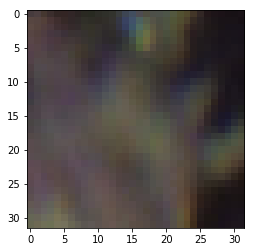

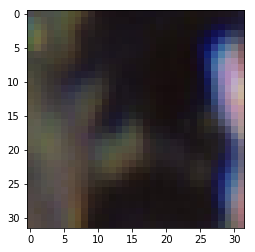

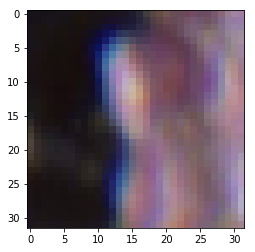

In [43]:
print(np.array(labels).shape)
print(labels[0].shape)
plt.figure()
plt.imshow(labels[0])
plt.figure()
plt.imshow(labels[1])
plt.figure()
plt.imshow(labels[2])

In [44]:
compressed_files = sorted(os.listdir('compressed_new'))

block_size = 32
stride = 16
img_size = 1024
row_num = (img_size - block_size) // stride + 1
col_num = (img_size - block_size) // stride + 1

compressed = []
for file in compressed_files:
    img = cv2.resize(cv2.imread('compressed_new/'+file),(1024,1024))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     row_num = (img.shape[0] - block_size) // stride + 1
#     col_num = (img.shape[1] - block_size) // stride + 1

#     print(row_num)
#     print(col_num)

    for y in range(row_num):
        for x in range(col_num):
            x_start = x*stride
            x_end = x_start+block_size
            y_start = y*stride
            y_end = y_start+block_size
            block = img[y_start:y_end, x_start:x_end]
            compressed.append(block)

len(compressed)

3175200

(3175200, 32, 32, 3)
(32, 32, 3)


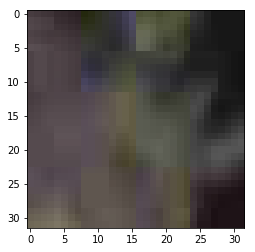

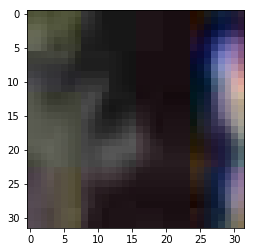

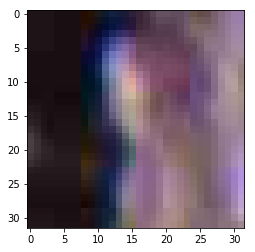

In [45]:
print(np.array(compressed).shape)
print(compressed[0].shape)
plt.figure()
plt.imshow(compressed[0])
plt.figure()
plt.imshow(compressed[1])
plt.figure()
plt.imshow(compressed[2])

In [46]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.0625, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(compressed[0:396900], labels[0:396900], test_size=0.2, random_state=42)

In [47]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


X_train = X_train.reshape(X_train.shape[0],32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

y_train = y_train.reshape(y_train.shape[0],32, 32, 3)
y_test = y_test.reshape(y_test.shape[0], 32, 32, 3)


X_train = X_train.astype('uint8')
X_test = X_test.astype('uint8')
y_train = y_train.astype('uint8')
y_test = y_test.astype('uint8')

# X_train /= 255
# X_test /= 255
# y_train /= 255
# y_test /= 255

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(317520, 32, 32, 3) (317520, 32, 32, 3) (79380, 32, 32, 3) (79380, 32, 32, 3)


In [48]:
# Defining the model
input_shape = (32,32,3)
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(9, 9), strides=(1, 1),activation='relu',input_shape=input_shape, padding='same'))
model.add(keras.layers.Conv2D(32, (7, 7), strides=(1, 1),activation='relu', padding='same'))
model.add(keras.layers.Conv2D(16, (1, 1), strides=(1, 1),activation='relu', padding='same'))
model.add(keras.layers.Conv2D(3, (5, 5), activation = 'linear', padding='same'))

In [49]:
# model.compile(optimizer=keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False), 
#               loss='mean_squared_error')
# reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)
filepath = 'color_ARCNN_weights_best.h5'
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, verbose=0, mode='min')

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min', min_lr=0.00001)

model_checkpt = keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, mode='min', period=1)

model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='mean_absolute_error')


In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        15616     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        100384    
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 16)        528       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 3)         1203      
Total params: 117,731
Trainable params: 117,731
Non-trainable params: 0
_________________________________________________________________


In [51]:
results = model.fit(X_train, y_train, batch_size = 512, epochs = 100, shuffle=True, verbose = 1, validation_split = 0.2, callbacks = [reduce_lr, model_checkpt, early_stop])


Train on 254016 samples, validate on 63504 samples
Epoch 1/100
254016/254016 [==============================] - 23s 90us/step - loss: 11.3296 - val_loss: 7.2353
Epoch 2/100
254016/254016 [==============================] - 23s 89us/step - loss: 6.3845 - val_loss: 6.9541
Epoch 3/100
254016/254016 [==============================] - 23s 89us/step - loss: 5.8522 - val_loss: 6.1381
Epoch 4/100
254016/254016 [==============================] - 23s 89us/step - loss: 5.5607 - val_loss: 6.1036
Epoch 5/100
254016/254016 [==============================] - 22s 88us/step - loss: 5.4174 - val_loss: 5.4342
Epoch 6/100
254016/254016 [==============================] - 23s 89us/step - loss: 5.3464 - val_loss: 5.1556
Epoch 7/100
254016/254016 [==============================] - 22s 88us/step - loss: 5.1978 - val_loss: 5.2336
Epoch 8/100
254016/254016 [==============================] - 23s 89us/step - loss: 5.1490 - val_loss: 5.0906
Epoch 9/100
254016/254016 [==============================] - 23s 89us/step -

254016/254016 [==============================] - 22s 88us/step - loss: 4.5286 - val_loss: 4.5427
Epoch 75/100
254016/254016 [==============================] - 22s 87us/step - loss: 4.5254 - val_loss: 4.5408
Epoch 76/100
254016/254016 [==============================] - 22s 88us/step - loss: 4.5236 - val_loss: 4.5545
Epoch 77/100
254016/254016 [==============================] - 22s 88us/step - loss: 4.5234 - val_loss: 4.5301
Epoch 78/100
254016/254016 [==============================] - 22s 88us/step - loss: 4.5212 - val_loss: 4.5340
Epoch 79/100
254016/254016 [==============================] - 22s 87us/step - loss: 4.5204 - val_loss: 4.5455
Epoch 80/100
254016/254016 [==============================] - 22s 87us/step - loss: 4.5198 - val_loss: 4.5621
Epoch 81/100
254016/254016 [==============================] - 22s 87us/step - loss: 4.5181 - val_loss: 4.5260
Epoch 82/100
254016/254016 [==============================] - 23s 89us/step - loss: 4.5161 - val_loss: 4.5310
Epoch 83/100
254016/254

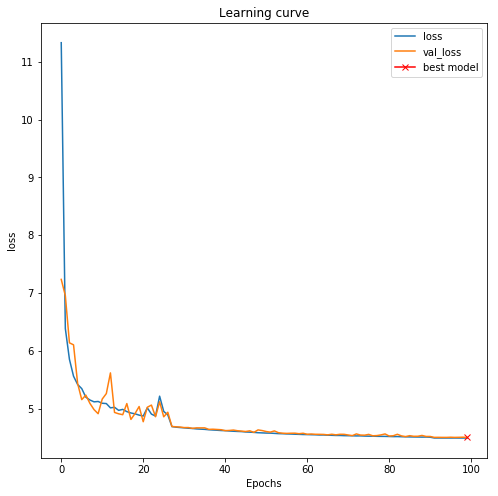

In [52]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend();

In [55]:
# serialize model to JSON
model_json = model.to_json()
with open("color_ARCNN_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("color_ARCNN_model.h5")
print("Saved model to disk")

Saved model to disk


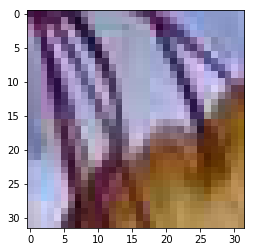

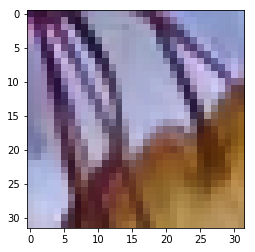

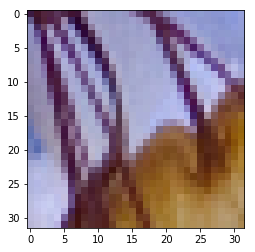

In [64]:
k = 1
test_img = X_test[k].reshape(1,32,32,3)
pred_img = model.predict(test_img)
pred_img = pred_img.reshape(32,32,3)
pred_img = pred_img.astype('uint8')
plt.imshow(X_test[k].reshape(32,32,3))
plt.figure()
plt.imshow(pred_img)
plt.figure()
plt.imshow(y_test[k])

(1024, 1024, 3)


3969

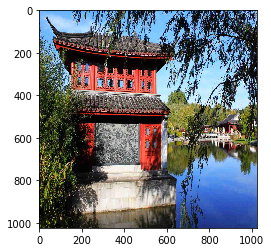

In [69]:
test_sample = cv2.resize(cv2.imread('compressed_new/'+compressed_files[700]),(1024,1024))
# plt.figure()
plt.imshow(test_sample)
test_sample = cv2.cvtColor(test_sample, cv2.COLOR_BGR2RGB)
plt.imshow(test_sample)
print(test_sample.shape)
row_num = (test_sample.shape[0] - block_size) // stride + 1
col_num = (test_sample.shape[1] - block_size) // stride + 1

# print(row_num)
# print(col_num)
# x = 0 
# y = 0
# x_start = x*stride
# x_end = x_start+block_size
# y_start = y*stride
# y_end = y_start+block_size
# block = test_sample[y_start:y_end, x_start:x_end]
# plt.figure()
# plt.imshow(block)
# test_data = []
# patch = model.predict(block.reshape(1,32,32,3))
# patch = patch.reshape(32,32,3)
# patch = patch.astype('uint8')
# plt.imshow(patch)

for y in range(row_num):
    for x in range(col_num):
        x_start = x*stride
        x_end = x_start+block_size
        y_start = y*stride
        y_end = y_start+block_size
        block = test_sample[y_start:y_end, x_start:x_end]
        test_data.append(model.predict(block.reshape(1,32,32,3)))

len(test_data)

(1024, 1024, 3)
(63, 63, 32, 32, 3)
(63, 63, 32, 32, 3)


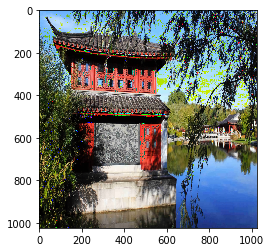

In [87]:
recon = np.ones((test_sample.shape[0],test_sample.shape[1],3))
print(recon.shape)
test_data = np.array(test_data)
print(test_data.shape)
test_data = np.reshape(test_data, (row_num, col_num, 32,32,3))
print(test_data.shape)
for i in range(row_num):
    for j in range(col_num):
        recon[i*16:(i*16)+32, j*16:(j*16)+32, :] = test_data[i][j].astype('uint8')
#         recon[i*16:(i*16)+32, j*16:(j*16)+32, :] = test_data
#         print(recon[(i*16):(i*16)+32, (j*16):(j*16)+32, :].shape)
for i, row in enumerate(test_data):
    for j, col in enumerate(row):
        if i%2 != 0 and j%2 != 0:
            recon[(i*16):(i*16)+32, (j*16):(j*16)+32, :] = (recon[(i*16):(i*16)+32, (j*16):(j*16)+32]
                                                                                        + row[j].astype('uint8'))/2

recon = recon.astype('uint8')
plt.imshow(recon) 

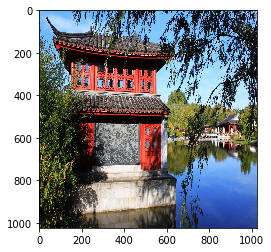

MSE:  139.53490257263184
MSE:  155.17972469329834


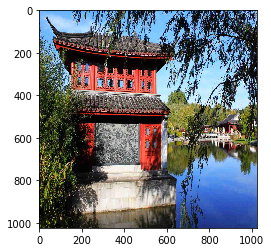

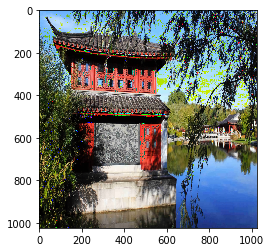

In [88]:
y = cv2.resize(cv2.imread('DIV2K_train_HR/'+filenames[700]),(1024,1024))
y = cv2.cvtColor(y, cv2.COLOR_BGR2RGB)
recon.shape
x = cv2.resize(cv2.imread('compressed_new/'+compressed_files[700]),(1024,1024))
x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

# plt.subplot(121)
plt.imshow(y)
plt.show()
# plt.subplot(122)
plt.figure()
plt.imshow(x)
plt.figure()
plt.imshow(recon)

err = np.sum((recon - y.reshape(y.shape[0],y.shape[1],3)) ** 2)
err /= float(recon.shape[0] * recon.shape[1])
print("MSE: ",err)
err1 = np.sum((x - y.reshape(y.shape[0],y.shape[1],3)) ** 2)
err1 /= float(recon.shape[0] * recon.shape[1])
print("MSE: ",err1)

In [89]:
import math
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

print(psnr(recon, y.reshape(y.shape[0],y.shape[1],3)))
print(psnr(x, y.reshape(y.shape[0],y.shape[1],3)))

31.45518762108658
30.993666385432455
